# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyod
import sklearn
import scipy
from pyod.models.pca import PCA
from pyod.models.kpca import KPCA
from sklearn.metrics import balanced_accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import scipy
import sklearn.model_selection
import sklearn.preprocessing

2024-12-11 16:27:42.646899: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-11 16:27:42.674897: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-11 16:27:42.678965: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-11 16:27:42.689771: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-11 16:27:42.706312: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

# Exercise 1

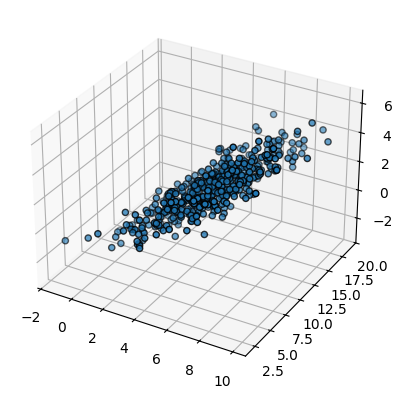

Eigenvalues: [ 0.39074529  4.01212731 11.20001736]
Eigenvectors:
 [[ 0.63342119  0.70379366 -0.32163967]
 [-0.04825322 -0.37892457 -0.92416871]
 [-0.77230125  0.6009082  -0.20605854]]


In [2]:
mean = [5, 10, 2]
cov = [[3, 2, 2], [2, 10, 1], [2, 1, 2]]
data = np.random.multivariate_normal(mean, cov, 500)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], edgecolors="k")
plt.show()

data_centered = data - np.mean(data, axis=0)
cov_matrix = np.cov(data_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

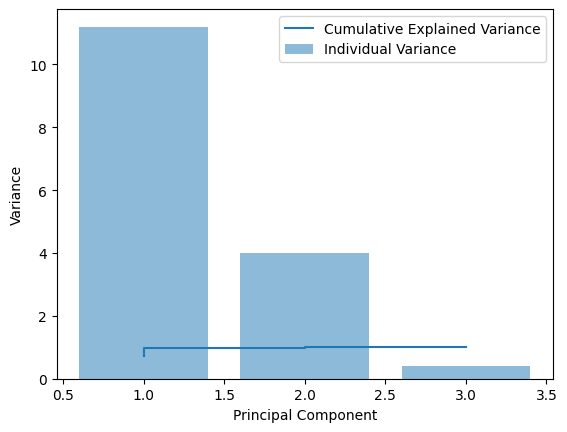

In [3]:
sorted_eigenvalues = np.sort(eigenvalues)[::-1]
cumulative_explained_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

plt.step(range(1, len(eigenvalues) + 1), cumulative_explained_variance, label="Cumulative Explained Variance")
plt.bar(range(1, len(eigenvalues) + 1), sorted_eigenvalues, alpha=0.5, label="Individual Variance")

plt.xlabel("Principal Component")
plt.ylabel("Variance")
plt.legend()
plt.show()

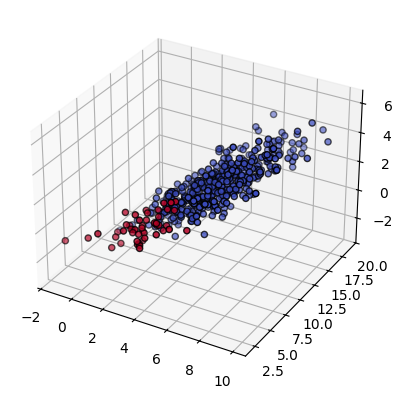

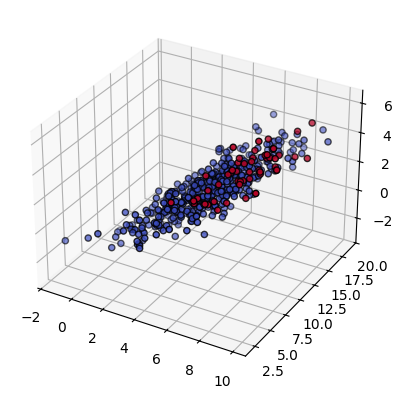

In [4]:
projected_data = np.dot(data_centered, eigenvectors)

third_component = projected_data[:, 2]
threshold_3rd = np.quantile(third_component, 1 - 0.1)
outliers_3rd = third_component > threshold_3rd

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=outliers_3rd, cmap="coolwarm", edgecolors="k")
plt.show()

second_component = projected_data[:, 1]
threshold_2nd = np.quantile(second_component, 1 - 0.1)
outliers_2nd = second_component > threshold_2nd

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=outliers_2nd, cmap="coolwarm", edgecolors="k")
plt.show()

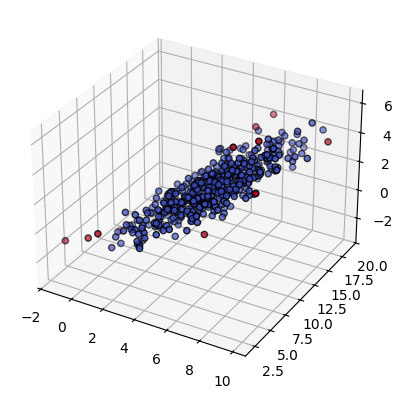

In [5]:
projected_data = np.dot(data_centered, eigenvectors)

centroid = np.mean(projected_data, axis=0)
distances = np.linalg.norm((projected_data - centroid) / np.std(projected_data, axis=0), axis=1)

threshold = 3
outliers = distances > threshold

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=outliers, cmap="coolwarm", edgecolors="k")
plt.show()

# Exercise 2

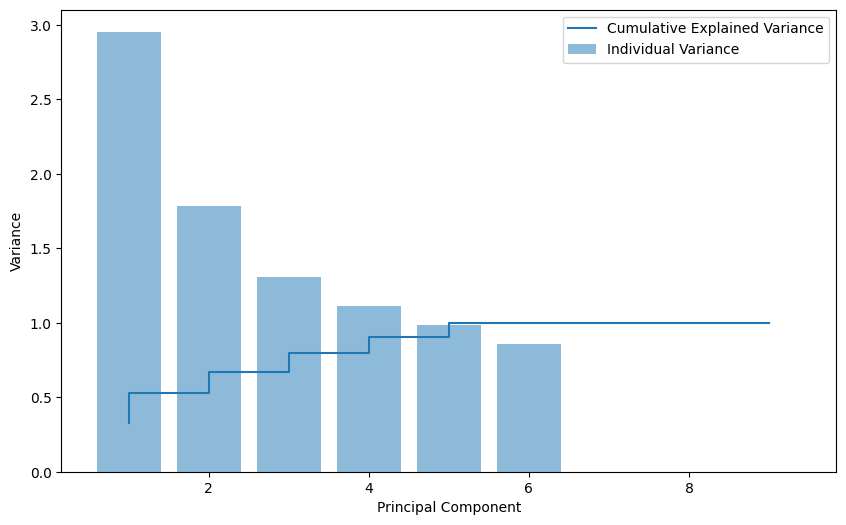

In [6]:
data = scipy.io.loadmat("shuttle.mat")
X = data["X"]
y = data["y"].flatten()

scaler = sklearn.preprocessing.StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.4)

pca_model = PCA(contamination=0.2)
pca_model.fit(X_train)

explained_variance = pca_model.explained_variance_
cumulative_variance = np.cumsum(explained_variance) / np.sum(explained_variance)

plt.figure(figsize=(10, 6))
plt.step(range(1, len(explained_variance) + 1), cumulative_variance, label="Cumulative Explained Variance")
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, label="Individual Variance")
plt.xlabel("Principal Component")
plt.ylabel("Variance")
plt.legend()
plt.show()

In [7]:
y_train_pred_pca = pca_model.labels_
y_test_pred_pca = pca_model.predict(X_test)

train_balanced_accuracy_pca = balanced_accuracy_score(y_train, y_train_pred_pca)
test_balanced_accuracy_pca = balanced_accuracy_score(y_test, y_test_pred_pca)

print(f"PCA Balanced Accuracy (Train): {train_balanced_accuracy_pca:.4f}")
print(f"PCA Balanced Accuracy (Test): {test_balanced_accuracy_pca:.4f}")

kpca_model = KPCA(contamination=0.2)
kpca_model.fit(X_train)

y_train_pred_kpca = kpca_model.labels_
y_test_pred_kpca = kpca_model.predict(X_test)

train_balanced_accuracy_kpca = balanced_accuracy_score(y_train, y_train_pred_kpca)
test_balanced_accuracy_kpca = balanced_accuracy_score(y_test, y_test_pred_kpca)

print(f"KPCA Balanced Accuracy (Train): {train_balanced_accuracy_kpca:.4f}")
print(f"KPCA Balanced Accuracy (Test): {test_balanced_accuracy_kpca:.4f}")

PCA Balanced Accuracy (Train): 0.9239
PCA Balanced Accuracy (Test): 0.9194


KeyboardInterrupt: 

# Exercise 3

In [42]:
data = scipy.io.loadmat("shuttle.mat")
X = data["X"]
y = data["y"].flatten()

scaler = sklearn.preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.5)

In [43]:
class Autoencoder(tf.keras.Model):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        self.encoder = Sequential([
            layers.Dense(8, activation="relu", input_shape=(input_dim,)),
            layers.Dense(5, activation="relu"),
            layers.Dense(3, activation="relu")
        ])
        
        self.decoder = Sequential([
            layers.Dense(5, activation="relu", input_shape=(3,)),
            layers.Dense(8, activation="relu"),
            layers.Dense(9, activation="sigmoid")  
        ])
        
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

In [44]:
input_dim = X_train.shape[1]
autoencoder = Autoencoder(input_dim)
autoencoder.compile(optimizer="adam", loss="mse")

/root/.conda/envs/python3.9/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0217 - val_loss: 0.0200
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - val_loss: 0.0183
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - val_loss: 0.0164
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - val_loss: 0.0145
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - val_loss: 0.0126
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - val_loss: 0.0109
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - val_loss: 0.0083
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - val_loss: 0.0074
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - val_loss: 0.0067
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - val_loss: 0.0061
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - val_l

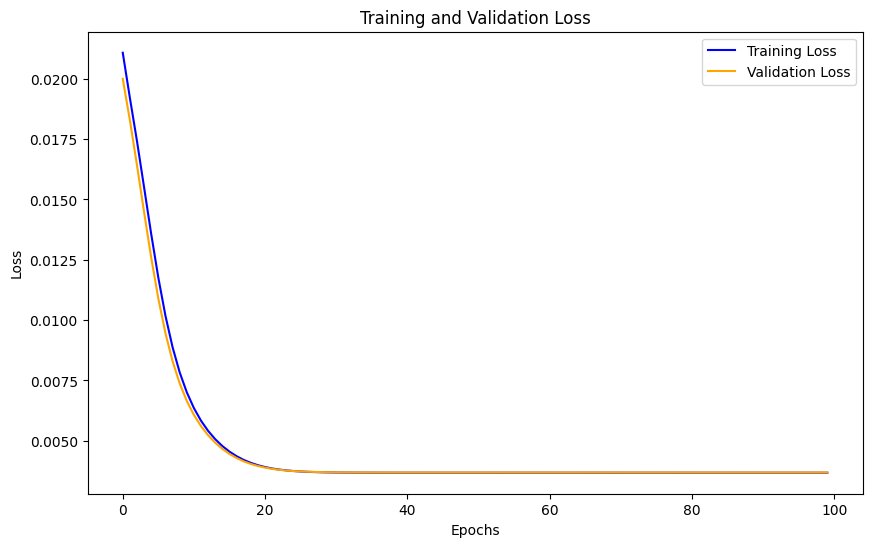

In [45]:
history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=1024, 
    validation_data=(X_test, X_test), 
    verbose=1
)

plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Training Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [46]:
reconstructed_train = autoencoder.predict(X_train)
reconstruction_errors = np.mean(np.square(X_train - reconstructed_train), axis=1)

contamination_rate = 0.2  
threshold = np.quantile(reconstruction_errors, 1 - contamination_rate)

train_predictions = (reconstruction_errors > threshold).astype(int)

balanced_acc_train = balanced_accuracy_score(y_train, train_predictions)
print(f"Balanced Accuracy (Train): {balanced_acc_train}")

reconstructed_test = autoencoder.predict(X_test)
reconstruction_errors_test = np.mean(np.square(X_test - reconstructed_test), axis=1)

test_predictions = (reconstruction_errors_test > threshold).astype(int)

balanced_acc_test = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy (Test): {balanced_acc_test}")

227/768 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

768/768 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Balanced Accuracy (Train): 0.9141914620251992
768/768 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step
Balanced Accuracy (Test): 0.9155719020512313


# Exercise 4

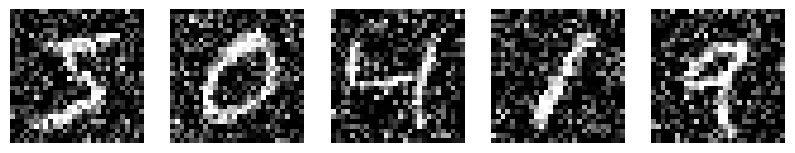

In [26]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train_noisy = x_train + 0.35 * tf.random.normal(shape=tf.shape(x_train), dtype=tf.float32)
x_test_noisy = x_test + 0.35 * tf.random.normal(shape=tf.shape(x_test), dtype=tf.float32)

x_train_noisy = tf.clip_by_value(x_train_noisy, 0.0, 1.0)
x_test_noisy = tf.clip_by_value(x_test_noisy, 0.0, 1.0)

plt.figure(figsize=(10, 2))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    ax.imshow(x_train_noisy[i], cmap="gray")
    ax.axis("off")
plt.show()

In [27]:
class ConvolutionalAutoencoder(tf.keras.Model):
    def __init__(self):
        super(ConvolutionalAutoencoder, self).__init__()

        self.encoder = Sequential([
            layers.Conv2D(8, (3, 3), activation="relu", strides=2, padding="same", input_shape=(28, 28, 1)),
            layers.Conv2D(4, (3, 3), activation="relu", strides=2, padding="same")
        ])
        
        self.decoder = Sequential([
            layers.Conv2DTranspose(4, (3, 3), activation="relu", strides=2, padding="same"),
            layers.Conv2DTranspose(8, (3, 3), activation="relu", strides=2, padding="same"),
            layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")
        ])
    
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

In [28]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_train_noisy = np.expand_dims(x_train_noisy, axis=-1)
x_test_noisy = np.expand_dims(x_test_noisy, axis=-1)

In [29]:
autoencoder = ConvolutionalAutoencoder()
autoencoder.compile(optimizer="adam", loss="mse")

autoencoder.fit(
    x_train, x_train, 
    epochs=10, 
    batch_size=64, 
    validation_data=(x_test, x_test)
)

Epoch 1/10


938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - loss: 0.0821 - val_loss: 0.0075
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - loss: 0.0069 - val_loss: 0.0053
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - loss: 0.0037 - val_loss: 0.0035


In [30]:
reconstructed_train = autoencoder.predict(x_train)
reconstruction_errors = np.mean(np.square(x_train - reconstructed_train), axis=(1, 2, 3))
threshold = np.mean(reconstruction_errors) + np.std(reconstruction_errors)

reconstructed_test = autoencoder.predict(x_test)
reconstructed_test_noisy = autoencoder.predict(x_test_noisy)

errors_original = np.mean(np.square(x_test - reconstructed_test), axis=(1, 2, 3))
labels_original = (errors_original > threshold).astype(int)
accuracy_original = balanced_accuracy_score([0] * len(labels_original), labels_original)

errors_noisy = np.mean(np.square(x_test - reconstructed_test_noisy), axis=(1, 2, 3))
labels_noisy = (errors_noisy > threshold).astype(int)
accuracy_noisy = balanced_accuracy_score([1] * len(labels_noisy), labels_noisy)


print(f"Accuracy for original images: {accuracy_original}")
print(f"Accuracy for noisy images: {accuracy_noisy}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Accuracy for original images: 0.8815
Accuracy for noisy images: 1.0


/root/.conda/envs/python3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/root/.conda/envs/python3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


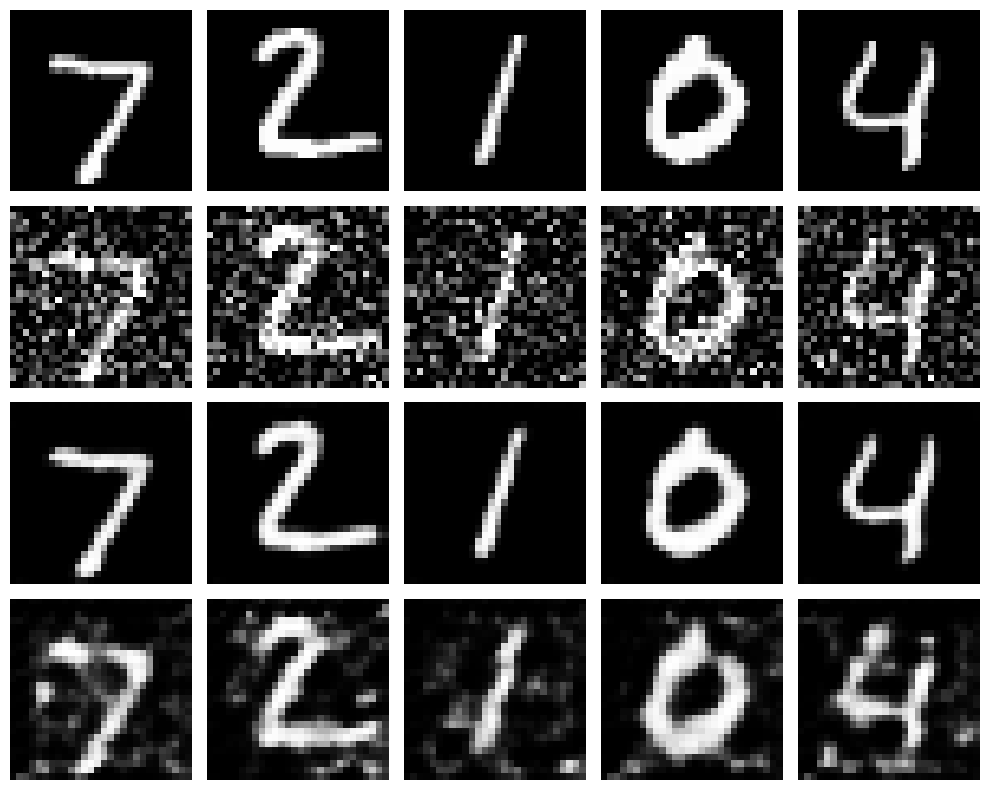

In [31]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
for i in range(5):
    axes[0, i].imshow(x_test[i].squeeze(), cmap="gray")
    axes[0, i].axis("off")

    axes[1, i].imshow(x_test_noisy[i].squeeze(), cmap="gray")
    axes[1, i].axis("off")

    axes[2, i].imshow(reconstructed_test[i].squeeze(), cmap="gray")
    axes[2, i].axis("off")

    axes[3, i].imshow(reconstructed_test_noisy[i].squeeze(), cmap="gray")
    axes[3, i].axis("off")

plt.tight_layout()
plt.show()

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - loss: 0.0120 - val_loss: 0.0103
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - loss: 0.0098 - val_loss: 0.0096
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - loss: 0.0095 - val_loss: 0.0093
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


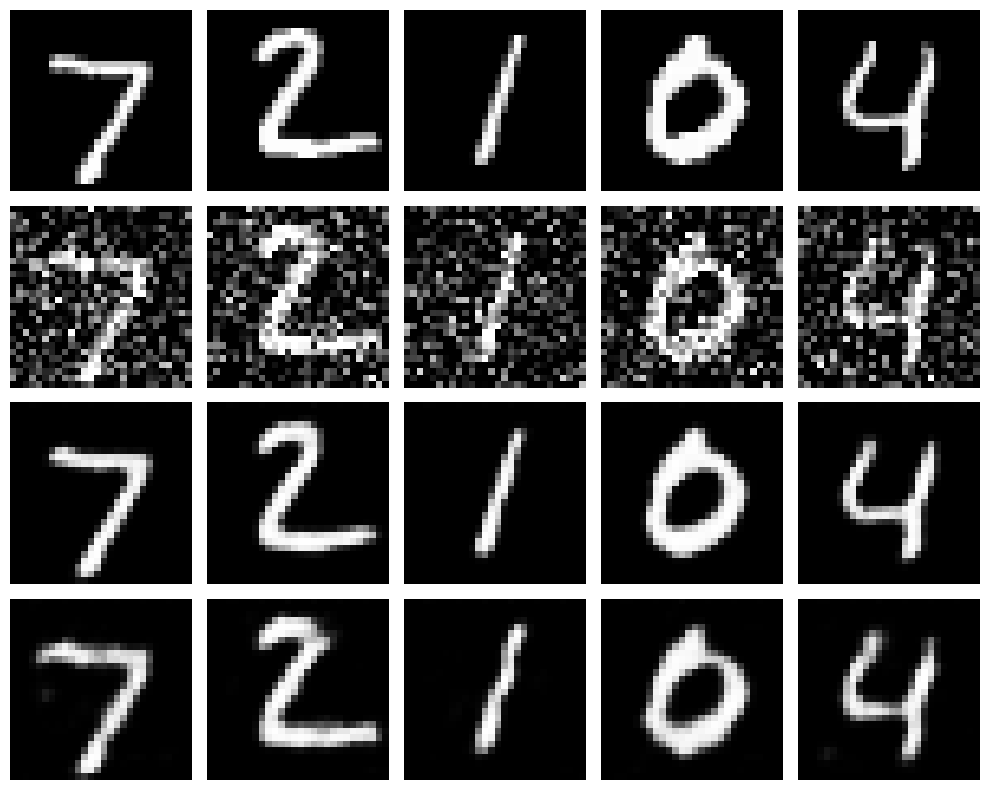

In [32]:
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test_noisy, x_test),
    verbose=1
)

denoised_test = autoencoder.predict(x_test)
denoised_test_noisy = autoencoder.predict(x_test_noisy)

fig, axes = plt.subplots(4, 5, figsize=(10, 8))
for i in range(5):
    axes[0, i].imshow(x_test[i].squeeze(), cmap='gray')
    axes[0, i].axis('off')

    axes[1, i].imshow(x_test_noisy[i].squeeze(), cmap='gray')
    axes[1, i].axis('off')

    axes[2, i].imshow(denoised_test[i].squeeze(), cmap='gray')
    axes[2, i].axis('off')

    axes[3, i].imshow(denoised_test_noisy[i].squeeze(), cmap='gray')
    axes[3, i].axis('off')

plt.tight_layout()
plt.show()